In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Linear regression

<ipython-input-29-de206b3b1893>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # True relationship
<ipython-input-29-de206b3b1893>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(a, b, 'x', Color='r', MarkerSize = 10, label='Noisy data') # Noisy measurements
<ipython-input-29-de206b3b1893>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(a,xtilde * a,'--',Color='b',LineWidth=4, label='Regression line')


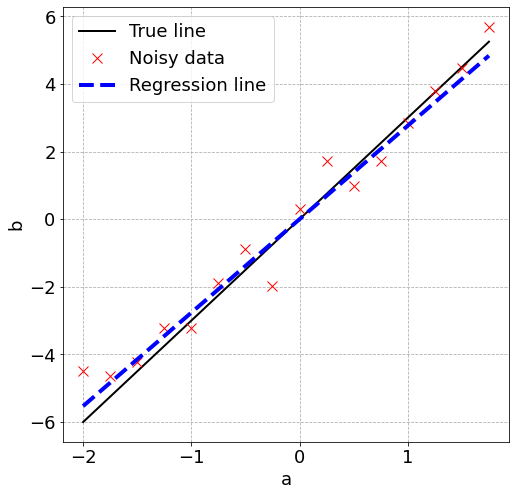

In [29]:
# Generate artificial data
x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # Add noise

plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', Color='r', MarkerSize = 10, label='Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(a,full_matrices=False)
# pseudo_inverse A+
pseudo_A = VT.T @ np.linalg.inv(np.diag(S)) @ U.T
xtilde = pseudo_A @ b # Least-square fit

plt.plot(a,xtilde * a,'--',Color='b',LineWidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

## Three methods of computing pseudo inverse of matrix A

In [30]:
pseudo_A1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T
pseudo_A2 = np.linalg.pinv(a)

# Compare the 2 matrices:
(pseudo_A1 == pseudo_A2).all()

True

# Boston Housing Data

In [31]:
# Load dataset
H = np.loadtxt(os.path.join('..','DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors
print("Shape of matrix A", A.shape, "First 5 lines of A are" , A[:5,:], sep="\n")
print("Shape of vector b", b.shape, "First 5 values of b are" , b[:5], sep="\n")

Shape of matrix A
(506, 13)
First 5 lines of A are
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
Shape of vector b
(506,)
First 5 values of b are
[24.  21.6 34.7 33.4 36.2]


<ipython-input-32-6eb9ea079ceb>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
<ipython-input-32-6eb9ea079ceb>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
<ipython-input-32-6eb9ea079ceb>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(A[sort_ind,:]@x, '-o', Color='r', LineWidth=0.5, MarkerSize=6, label='Regression')
<ipython-input-32-6eb9ea079ceb>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(b[sort_ind], Color='k', LineWidth=2, label='Housing 

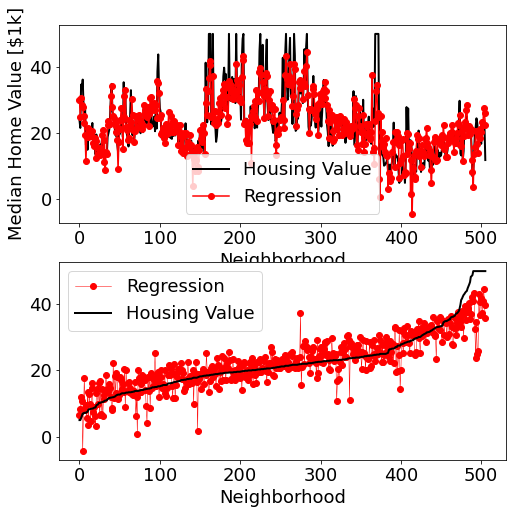

In [32]:
# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)


# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = np.linalg.pinv(A) @ b
fig = plt.figure()
ax1 = fig.add_subplot(211)

plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(212)
sort_ind = np.argsort(H[:,-1])
plt.plot(A[sort_ind,:]@x, '-o', Color='r', LineWidth=0.5, MarkerSize=6, label='Regression')
plt.plot(b[sort_ind], Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

## The regression coefficients

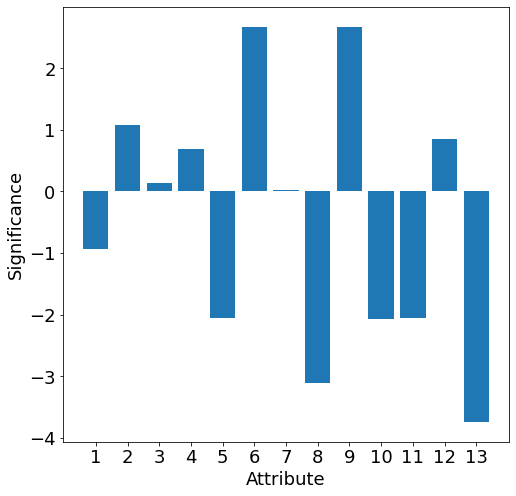

In [33]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std

A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()
